In [2]:
%matplotlib inline

# Chapter 2 Notes

The two major supervised learning models are classification (iris example in ch. 1 was this kind) and __regression__.

Classification has the goal of predicting class labels.  These types of problems are broken down ever further to __binary classification__ where the goal is to distinguish between exactly two classes (think of it like a yes/no question) and __multiclass classification__ where there are more than two classes to distinguish (the iris example was this type with its three class labels).

Regression has the goal of predicting a continuous number.  Some examples where regression models might be used are :
* predicting annual income based on education
* yield of a corn farm given different environmental factors

Easy way to distinguish which model to use: is there any continuity between the possible outcomes?  If so, regression is the way to go.  If results are discrete then classification is a better modelling strategy.

##### Generalization, Overfitting, Underfitting

Models that predict accurately on unseen data is said to generalize well.  Intuitively we expect simpler models to generalize better so we want to find the simplest model.  Building a model that is too complex for the amount of info is called __overfitting__.  This occurs when a model is fit too closely to the particulars of a training set.  The opposite of this is __underfitting__, when a model is too simple and may perform poorly on even the test data.  We want to find a model in the middle of these the gives the best generalization performance.

![Overfitting vs underfitting](provided/images/overfitting_underfitting_cartoon.png "Overfitting vs underfitting")

##### Supervised ML models

Some will be small and synthetic to highlight crtian features of an algorithm, others will be real world data. Some sample synthetic datasets:

* The following dataset it a good binary classification example.

c:\ipynot~1\intro-ml\venv\lib\site-packages\sklearn\externals\six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)
c:\ipynot~1\intro-ml\venv\lib\site-packages\sklearn\externals\joblib\__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)
c:\ipynot~1\intro-ml\venv\lib\site-packages\sklearn\utils\deprecation.py:85: DeprecationWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.

X.shape: (26, 2)


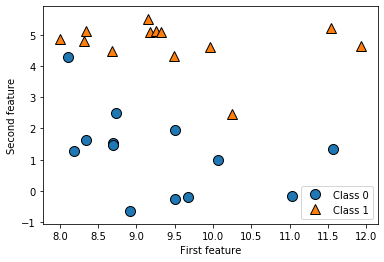

In [3]:
import mglearn
import matplotlib.pyplot as plt

# generate dataset
X, y = mglearn.datasets.make_forge()
# plot dataset
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.legend(["Class 0", "Class 1"], loc=4)
plt.xlabel("First feature")
plt.ylabel("Second feature")
print("X.shape: {}".format(X.shape))  # 26 data points each with two features

* And this one is good to show an example of regression

Text(0, 0.5, 'Target')

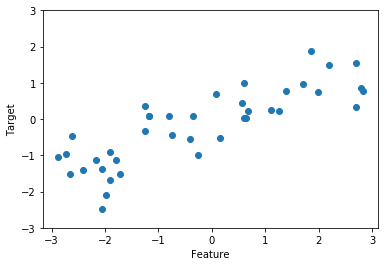

In [4]:
X, y = mglearn.datasets.make_wave(n_samples=40)
plt.plot(X, y, 'o')
plt.ylim(-3, 3)
plt.xlabel("Feature")
plt.ylabel("Target")

These synthetic sets will be complimented by a couple larger real world ones from`scikit-learn` (these datasets come as `Bunch` objects allowing value access as if you're accessing properties of an object so `bunch['key'] == bunch.key`).  The first dataset is breast cancer data from Wisconsin Breast Center (classifying tumors as benign or malignant).  The other is Boston Housing data (regression to predict house prices).  

In [5]:
from sklearn.datasets import load_breast_cancer
import numpy as np
cancer = load_breast_cancer()
print("cancer.keys(): \n{}".format(cancer.keys()))
print("Shape of cancer data: {}".format(cancer.data.shape))
print("Sample counts per class:\n{}".format({n: v for n, v in zip(cancer.target_names, np.bincount(cancer.target))}))
print("Feature names:\n{}".format(cancer.feature_names))
# print(cancer.DESCR)

cancer.keys(): 
dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])
Shape of cancer data: (569, 30)
Sample counts per class:
{'malignant': 212, 'benign': 357}
Feature names:
['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


In [6]:
from sklearn.datasets import load_boston
boston = load_boston()
print("Data shape: {}".format(boston.data.shape))

X, y = mglearn.datasets.load_extended_boston()
print("X.shape: {}".format(X.shape))

Data shape: (506, 13)
X.shape: (506, 104)


The Boston data is enhanced by also looking at the products between features (called __interactions__).  For example we will use the crime data and highway accessability and then also use the product odf these features.  This is called __feature engineering__ and will be covered more in Chapter 4. 

#### The Algorithms

##### k-Nearest Neighbors (k-NN) classification

Arguably the simplest ML model as all it does is store the training data and to make a prediction it calculates the closest data points.  The simplest version of this considers just one neighbor.  This can be scaled to more neighbors as desired.  Given a new data point the model calculates the distance from the new point to the existing ones and takes the _k_ closest points.  A classification is then made based on the classes the majority of the _k_ neighbors fall into.

c:\ipynot~1\intro-ml\venv\lib\site-packages\sklearn\utils\deprecation.py:85: DeprecationWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=DeprecationWarning)


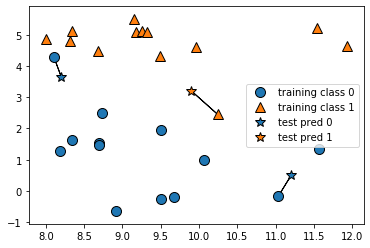

In [7]:
mglearn.plots.plot_knn_classification(n_neighbors=1)

c:\ipynot~1\intro-ml\venv\lib\site-packages\sklearn\utils\deprecation.py:85: DeprecationWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=DeprecationWarning)


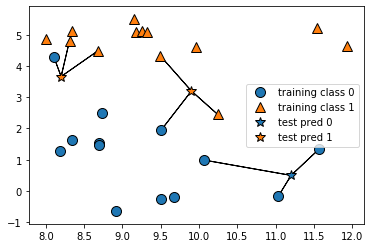

In [8]:
mglearn.plots.plot_knn_classification(n_neighbors=3)

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

X, y = mglearn.datasets.make_forge()
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
clf = KNeighborsClassifier(n_neighbors=3)
clf.fit(X_train, y_train)
print("Test set predictions: {}".format(clf.predict(X_test)))
print("Test set accuracy: {:.2f}".format(clf.score(X_test, y_test)))

Test set predictions: [1 0 1 0 1 0 0]
Test set accuracy: 0.86


c:\ipynot~1\intro-ml\venv\lib\site-packages\sklearn\utils\deprecation.py:85: DeprecationWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=DeprecationWarning)


So the model was 86% accurate.  When we further analyze the model we might want to see all the possible predictions so we can plot the decision boundary.

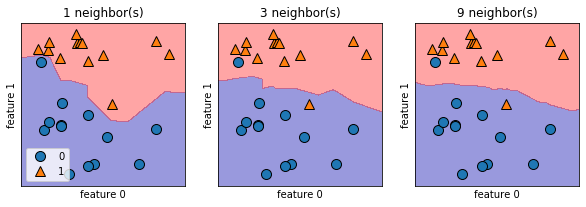

In [10]:
fig, axes = plt.subplots(1, 3, figsize=(10, 3))
for n_neighbors, ax in zip([1, 3, 9], axes):
    # the fit method returns the object self, so we can instantiate
    # and fit in one line
    clf = KNeighborsClassifier(n_neighbors=n_neighbors).fit(X, y)
    mglearn.plots.plot_2d_separator(clf, X, fill=True, eps=0.5, ax=ax, alpha=.4)
    mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)
    ax.set_title("{} neighbor(s)".format(n_neighbors))
    ax.set_xlabel("feature 0")
    ax.set_ylabel("feature 1")
axes[0].legend(loc=3)

One neighbor follows the training data closely and adding more neighbors results in a smoothing of the decision boundary.  A smoother decision boundary equals a simpler model (ake fewer neighbors = high model complexity).  The most extreme example is if _k_ equals the number of points in the training set, then the prediction will just be the most common class in the dataset.  Now trying to see how this model generalizes across real data given certain complexities:

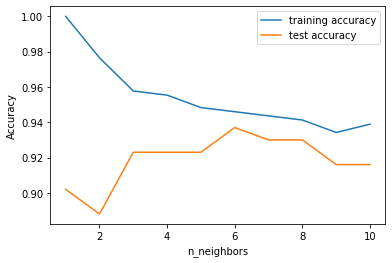

In [11]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, stratify=cancer.target, random_state=66)
training_accuracy = []
test_accuracy = []
# try n_neighbors from 1 to 10
neighbors_settings = range(1, 11)
for n_neighbors in neighbors_settings:
    # build the model
    clf = KNeighborsClassifier(n_neighbors=n_neighbors)
    clf.fit(X_train, y_train)
    # record training set accuracy
    training_accuracy.append(clf.score(X_train, y_train))
    # record generalization accuracy
    test_accuracy.append(clf.score(X_test, y_test))
plt.plot(neighbors_settings, training_accuracy, label="training accuracy")
plt.plot(neighbors_settings, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()

A lower number of neighbors is a higher complexity so our plot is flipped horitontally but it shows the right kind of behavior that we described about generalization earlier.  We can see there is a sweet-spot at 6 neighbors after which the model becomes too simple and starts becoming less accurate.

##### _k_-neigbors regression

_k_-NN also has a regression variant.  

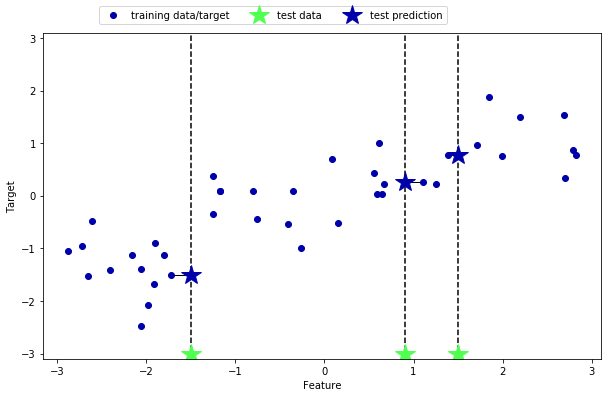

In [12]:
mglearn.plots.plot_knn_regression(n_neighbors=1)

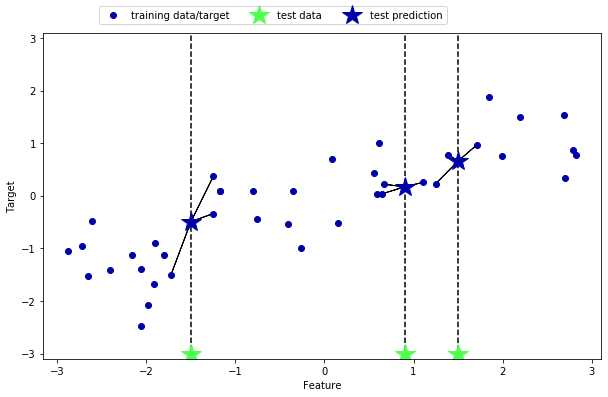

In [13]:
mglearn.plots.plot_knn_regression(n_neighbors=3)

In [14]:
from sklearn.neighbors import KNeighborsRegressor

X, y = mglearn.datasets.make_wave(n_samples=40)
# split the wave dataset into a training and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
# instantiate the model and set the number of neighbors to consider to 3
reg = KNeighborsRegressor(n_neighbors=3)
# fit the model using the training data and training targets
reg.fit(X_train, y_train)
print("Test set predictions:\n{}".format(reg.predict(X_test)))
print("Test set R^2: {:.2f}".format(reg.score(X_test, y_test)))

Test set predictions:
[-0.05396539  0.35686046  1.13671923 -1.89415682 -1.13881398 -1.63113382
  0.35686046  0.91241374 -0.44680446 -1.13881398]
Test set R^2: 0.83


As we can see the regressor model is pretty similar to the classification model.  It can be evaluated still with the `score` method, but it will return the $R^2$ score (the coefficient of determination).  This is a measure of thr goodness of a regression prediction and will always be between 0 and 1.  If $R^2 = 0$ then we have a perfect prediction, while $R^2 = 0$ is a constant model that just returns the mean.  A score of 0.83 is a relatively good fit.

Analysis of this model:

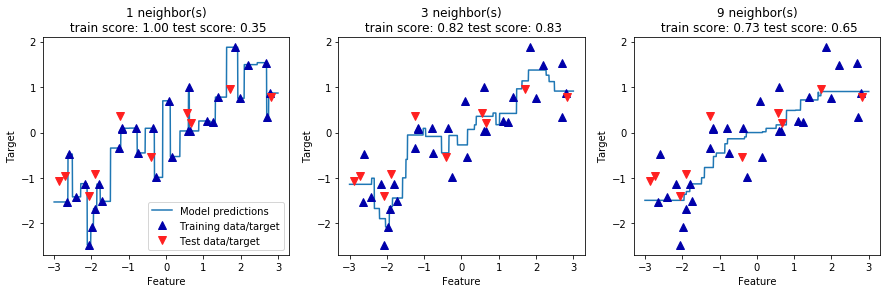

In [15]:
fig, axes = plt.subplots(1, 3, figsize=(15, 4))
# create 1,000 data points, evenly spaced between -3 and 3
line = np.linspace(-3, 3, 1000).reshape(-1, 1)
for n_neighbors, ax in zip([1, 3, 9], axes):
    # make predictions using 1, 3, or 9 neighbors
    reg = KNeighborsRegressor(n_neighbors=n_neighbors)
    reg.fit(X_train, y_train)
    ax.plot(line, reg.predict(line))
    ax.plot(X_train, y_train, '^', c=mglearn.cm2(0), markersize=8)
    ax.plot(X_test, y_test, 'v', c=mglearn.cm2(1), markersize=8)
    ax.set_title("{} neighbor(s)\n train score: {:.2f} test score: {:.2f}".format(n_neighbors, 
                                                                                  reg.score(X_train, y_train),
                                                                                  reg.score(X_test, y_test)))
    ax.set_xlabel("Feature")
    ax.set_ylabel("Target")
    axes[0].legend(["Model predictions", "Training data/target", "Test data/target"], loc="best")

As we can see a single neighbor causes unsteady predictions while more neighbors cause a smoother fit but doesn't fit the training data as well.

###### Strengths, weaknesses, and parameters

_k_-NN, in principle, has two important parameters, the number of neighbors and how distance is measured.  Usually a small number of neighbors (3 to 5) is good in practice but the can and should be adjusted.  By default Euclidean distance is used  for how distance is measured which is good for most settings.

Strengths:
* easy to understand
* reasonable performace without much adjustment
* good baseline before more complicated models are used

Weaknesses:
* Slow to predict on very large datasets (by samples or features)
* Preprocessing data is important when using _k_-NN (more on this in chapter 3)
* Bad method when most features are zero (aka a __sparse dataset__)

#### Linear Models

These types of models are widely used and use a __linear function__ on the input features.

##### Linear models for regression

The general formula for these models is:

$$ \hat{y} = w[0] * x[0] + w[1] * x[1] + . . . + w[p] * x[p] + b$$

This is just the general equation of a line (hence linear models). The $w$'s and $b$ are learned by the model.  

* For one feature the prediction is a line
* For two features the prediction is a plane
* More features are hyper-planes for the given dimesion

Let's look at a simple one-dimensional example:

w[0]: 0.393906  b: -0.031804


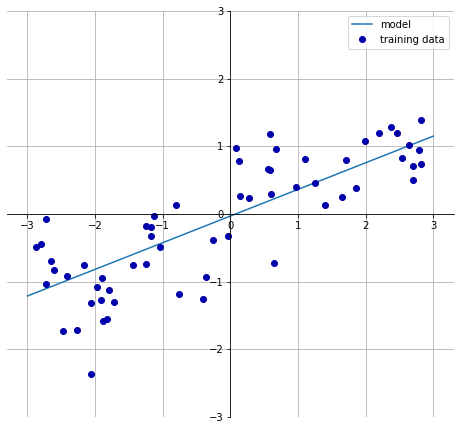

In [54]:
mglearn.plots.plot_linear_regression_wave()

A line vs the predictions of the `kNeighborsRegressor` seems very restrictive but a one-dimensional example is skewed.  If you have more features than training points any taget _y_ can be modelled exactly.  There are many different linear models for regression, the key difference between them being how the $w$'s and $b$ are chosen.

_**Linear regression (aka ordinary least squares)**_

Simplest and most classic linear model for regression. $w$ and $b$ are found so that the __mean square error__ is minimized between the predictions and the true regression targets of the training set.  Mean square error is the sum of the squared differences between prediction and true values divided by number of samples.  This model is nice because it has no parameters, however this gives users no control over complexity. The following code produces the fit in the plot above.

_NOTE:_  `scikit-learn` stores derived quantities from the training data with names that end in an underscore, hence the `coef_` and `intercept_` names.

In [18]:
from sklearn.linear_model import LinearRegression
X, y = mglearn.datasets.make_wave(n_samples=60)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
lr = LinearRegression().fit(X_train, y_train)

print("lr.coef_: {}".format(lr.coef_))
print("lr.intercept_: {}".format(lr.intercept_))
print()
print("Training set score: {:.2f}".format(lr.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lr.score(X_test, y_test)))

lr.coef_: [0.39390555]
lr.intercept_: -0.031804343026759746

Training set score: 0.67
Test set score: 0.66


`intercept_` is always a single float, `coef_` is a NumPy array with one entry per feature.  0.66 for $R^2$ is not great but since its close to the training set score we probably underfit the data.  It's hard to overfit on a simple example like this but once we get to higher dimensions linear models are more powerful and we must be careful not to overfit.

In [19]:
X, y = mglearn.datasets.load_extended_boston()
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
lr = LinearRegression().fit(X_train, y_train)

print("Training set score: {:.2f}".format(lr.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lr.score(X_test, y_test)))

Training set score: 0.95
Test set score: 0.61


Now with this real world data we see a case of overfitting since the training data score was very good but the tet data score sucks.  We instead should look for a model that lets us control complexity.

_**Ridge regression**_

In this model $w$s are chosen such that the training data is fit well but also to minimize the magnitudes of the coefficients as well (try to make as close to zero as possible).  This intuitively means that each feature has as little effect on the outcome as possible.  This constraining is an example of __regularization__ (explicitly restricting a model to avoid overfitting).  Ridge specifically uses an L2 regularization.

In [26]:
from sklearn.linear_model import Ridge
ridge = Ridge().fit(X_train, y_train)
print("Training set score: {:.2f}".format(ridge.score(X_train, y_train)))
print("Test set score: {:.2f}".format(ridge.score(X_test, y_test)))

Training set score: 0.89
Test set score: 0.75


As we can see ridge scores lower on the training data but higher on the test data.  The model is more restricted so we have alower likelyhood of overfitting.  Ridge makes trade-offs between simplicity (small coefficients) and performace on the training set.  This trade-off can be specified by the `alpha` parameter (defaults to 1.0).  Higher `alpha`s cause closer to zero coefficients at the cost of performance.  Lower `alpha`s cause less restriction on coefficients and benefits performance (results become closer to a standard linear regression).

In [30]:
ridge10 = Ridge(alpha=10).fit(X_train, y_train)
print("Training set score: {:.2f}".format(ridge10.score(X_train, y_train)))
print("Test set score: {:.2f}".format(ridge10.score(X_test, y_test)))

ridge01 = Ridge(alpha=0.1).fit(X_train, y_train)
print("Training set score: {:.2f}".format(ridge01.score(X_train, y_train)))
print("Test set score: {:.2f}".format(ridge01.score(X_test, y_test)))

Training set score: 0.79
Test set score: 0.64
Training set score: 0.93
Test set score: 0.77


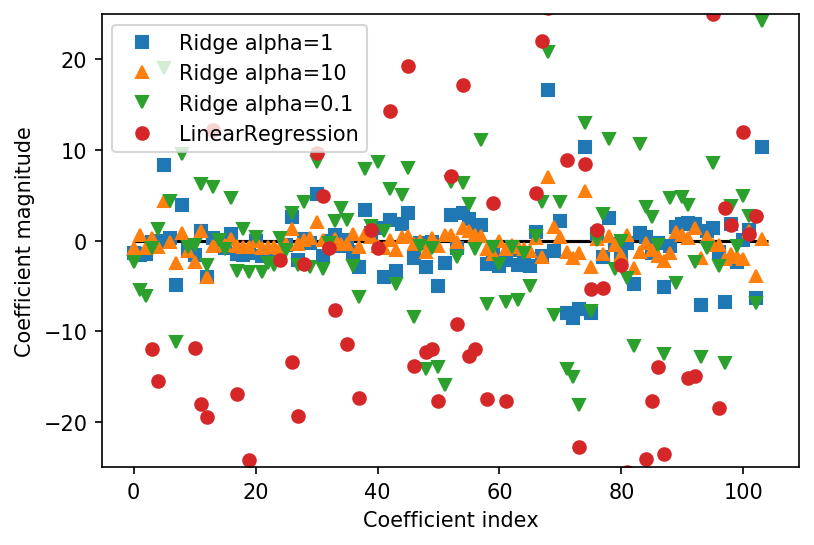

In [44]:
fig = plt.figure(dpi=150)
plt.plot(ridge.coef_, 's', label="Ridge alpha=1")
plt.plot(ridge10.coef_, '^', label="Ridge alpha=10")
plt.plot(ridge01.coef_, 'v', label="Ridge alpha=0.1")
plt.plot(lr.coef_, 'o', label="LinearRegression")
plt.xlabel("Coefficient index")
plt.ylabel("Coefficient magnitude")
plt.hlines(0, 0, len(lr.coef_))
plt.ylim(-25, 25)
plt.legend()

The plot confirms higher alpha values correspond to lower magnitudes and vice versa. Another way to visualize how regularization effects is to fix `alpha` and vary the amount of training data. A plot that shows model performance as a function of dataset size is called a __learning curve__.

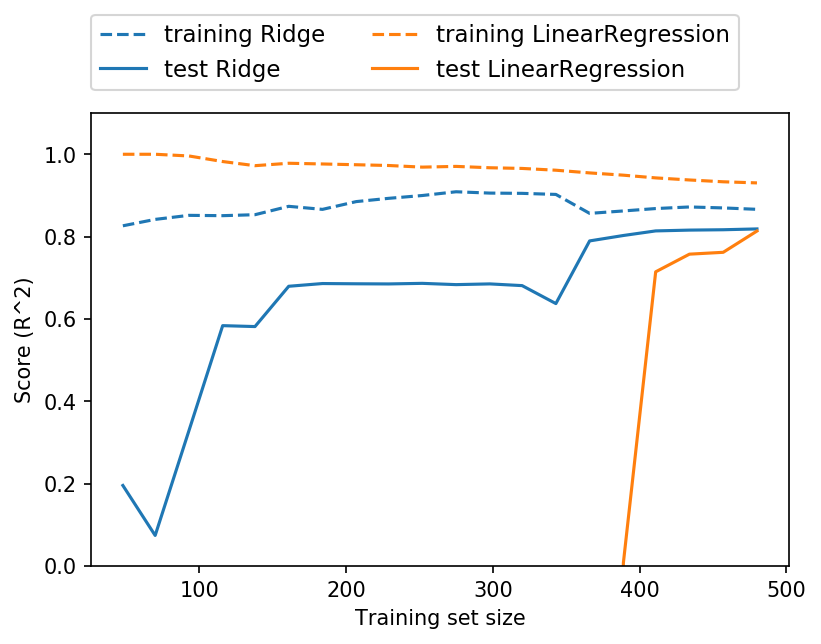

In [46]:
plt.figure(dpi=150)
mglearn.plots.plot_ridge_n_samples()

The plot shows the behavior we expect with the training set score better than the test set scores and the linear regression out performing on the training data because of its fewer constraints and ridge outperforming on the test data for the fact it has the constraints.  With more training data though, regularization becomes less important and the difference between ridge and lin reg becomes almost none.  Also note the decrease in performance in the training when more data is added. This is because with more data it become harder to overfit.

_**Lasso**_

An alternative to ridge is lasso.  The method is similar by restricting the coefficients, but lasso does it with an L1 regularization (causes some coefficients to be exactly 0 meaning they have no effect on the outcome). This is basically automatic feature selection and can help make the model easier to understand and reveal the most important features.

Training set score: 0.29
Test set score: 0.21
Number of features used: 4

Training set score: 0.90
Test set score: 0.77
Number of features used: 33
Training set score: 0.95
Test set score: 0.64
Number of features used: 96



Text(0, 0.5, 'Coefficient magnitude')

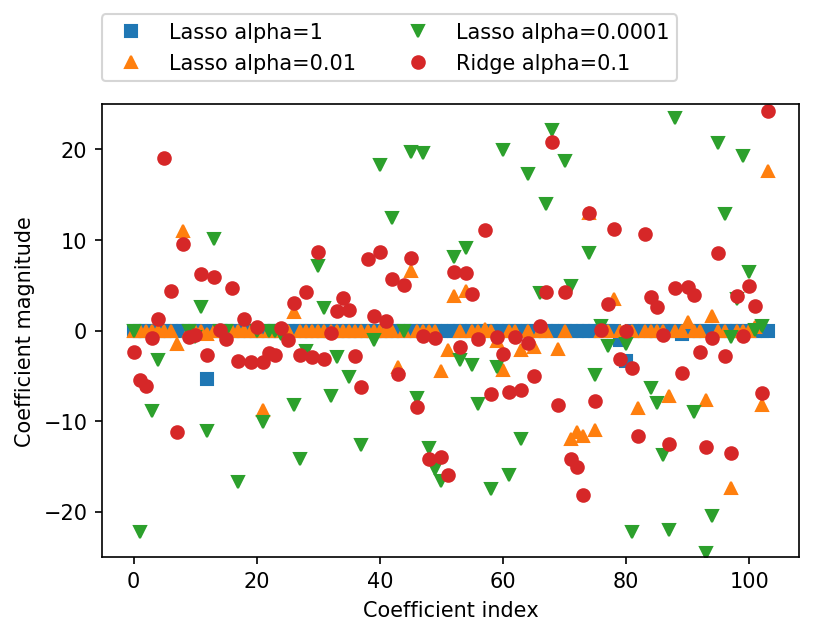

In [59]:
from sklearn.linear_model import Lasso
lasso = Lasso().fit(X_train, y_train)
print("Training set score: {:.2f}".format(lasso.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lasso.score(X_test, y_test)))
print("Number of features used: {}".format(np.sum(lasso.coef_ != 0)))
print()

# we increase the default setting of "max_iter",
# otherwise the model would warn us that we should increase max_iter.
lasso001 = Lasso(alpha=0.01, max_iter=100000).fit(X_train, y_train)
print("Training set score: {:.2f}".format(lasso001.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lasso001.score(X_test, y_test)))
print("Number of features used: {}".format(np.sum(lasso001.coef_ != 0)))

lasso00001 = Lasso(alpha=0.0001, max_iter=100000).fit(X_train, y_train)
print("Training set score: {:.2f}".format(lasso00001.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lasso00001.score(X_test, y_test)))
print("Number of features used: {}".format(np.sum(lasso00001.coef_ != 0)))
print()

plt.figure(dpi=150)
plt.plot(lasso.coef_, 's', label="Lasso alpha=1")
plt.plot(lasso001.coef_, '^', label="Lasso alpha=0.01")
plt.plot(lasso00001.coef_, 'v', label="Lasso alpha=0.0001")
plt.plot(ridge01.coef_, 'o', label="Ridge alpha=0.1")
plt.legend(ncol=2, loc=(0, 1.05))
plt.ylim(-25, 25)
plt.xlabel("Coefficient index")
plt.ylabel("Coefficient magnitude")

The performance is bad on both training and test data, a clear sign of underfitting, and the model only used 4 of the 105 features.  Trying again this time with tuned parameters we can see we get much better performace in both cases. Then with an even lower alpha we start to see more overfitting closer to a linear regression.

In practice ridge is the first choice between it and lasso, lasso is the better choice when there a lot of features and we think only a few contribute to the outcome.  `scikit-learn` also has the `ElasticNet` class which is a combination of ridge and lasso penalties.  In practive this works best but we have two paramters to tune for the two types of regularization.

##### Linear models for classification

These models are also regularly used for classification.  Predictions come from the following formula:

$$ \hat{y} = w[0] * x[0] + w[1] * x[1] + . . . + w[p] * x[p] + b > 0$$

This is similar to the regression but this time we threshold on zero and if $> 0$ we classify as class +1, and if $<0$  we classify as class -1.  So for a given number of dimensions a binary linear classification is dividing a set by a line, plane, or hyperplane.

Linear classification models are differntiated by:
* how combos of coefficients and intercepts fit the training data
* type of regularization that is used

Two most common are:
* __Logistic regression__ (`linear_model.LogisticRegression` in `scikit-learn`) which is actually a classification despite the name
* __Linear support vector machines__ (aka linear SVMs, `svm.LinearSVC` in `scikit-learn` where SVC stands for support vector classifier)

Applied to the `forge` dataset from earlier:

c:\ipynot~1\intro-ml\venv\lib\site-packages\sklearn\utils\deprecation.py:85: DeprecationWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=DeprecationWarning)
c:\ipynot~1\intro-ml\venv\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


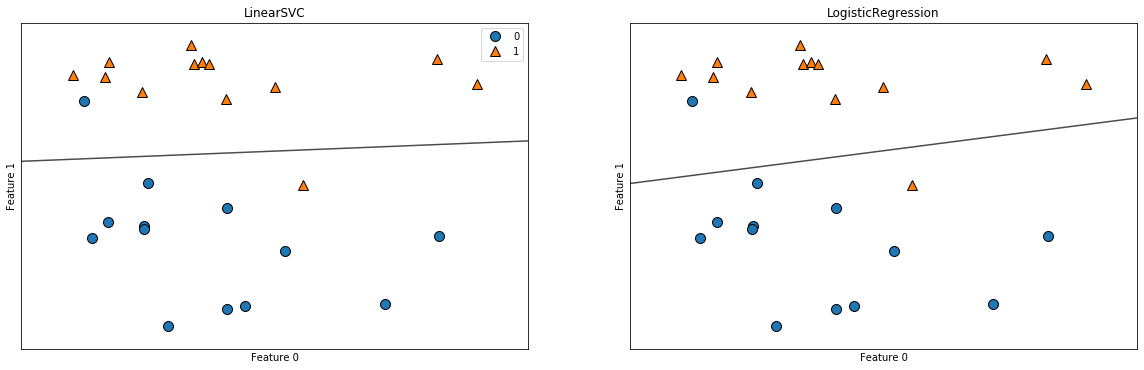

In [71]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
X, y = mglearn.datasets.make_forge()
fig, axes = plt.subplots(1, 2, figsize=(20, 6))
for model, ax in zip([LinearSVC(), LogisticRegression(solver='liblinear')], axes):
    clf = model.fit(X, y)
    mglearn.plots.plot_2d_separator(clf, X, fill=False, eps=0.5,
    ax=ax, alpha=.7)
    mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)
    ax.set_title("{}".format(clf.__class__.__name__))
    ax.set_xlabel("Feature 0")
    ax.set_ylabel("Feature 1")
axes[0].legend()

The two methods have similar decision boundary and by default apply L2 regularization.  For both the regularization strength parameter is `C` where higher is _less_ regularization (aka best possible fit to the training data) and lower stresses coefficients close to zero.

Low values of `C`means the algorithm adjusts to the "majority" of data points
High values of `C` stresses that each point is classified correctly

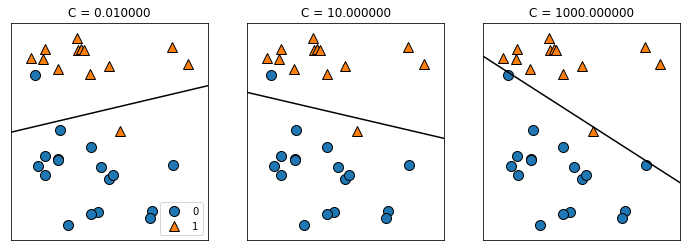

In [64]:
mglearn.plots.plot_linear_svc_regularization()

As we can see going from `C = 0.01` to `C = 10` causes the line to shift toward the misclassified objects.  For `C = 1000` we can see the model is probably overfitting. Now looking at a real dataset:

Training set score: 0.953
Test set score: 0.958

Training set score: 0.972
Test set score: 0.965

Training set score: 0.934
Test set score: 0.930


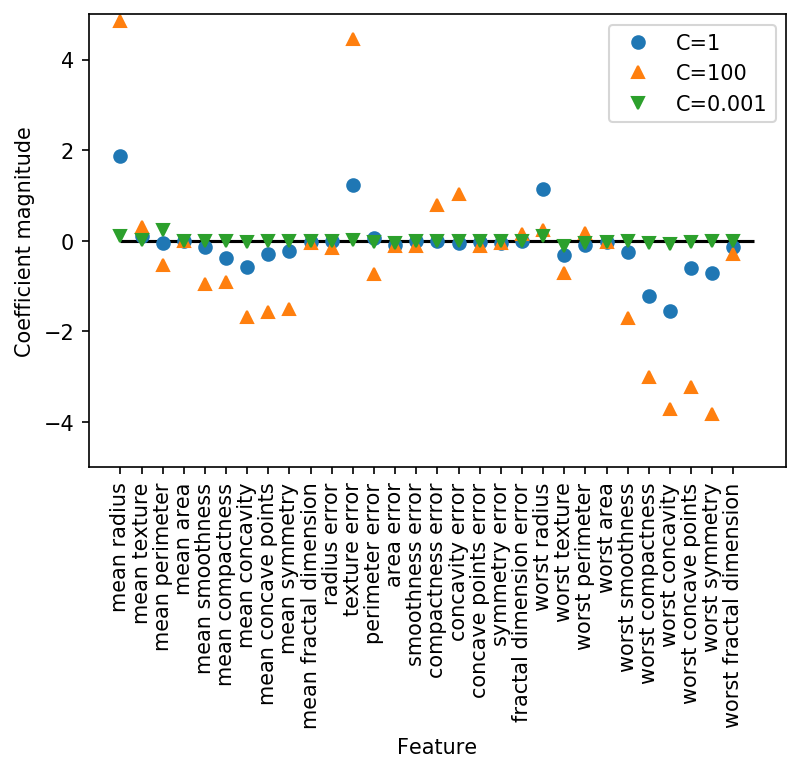

In [75]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, stratify=cancer.target, random_state=42)

logreg = LogisticRegression(solver='liblinear').fit(X_train, y_train)
print("Training set score: {:.3f}".format(logreg.score(X_train, y_train)))
print("Test set score: {:.3f}".format(logreg.score(X_test, y_test)))
print()
logreg100 = LogisticRegression(C=100, solver='liblinear').fit(X_train, y_train)
print("Training set score: {:.3f}".format(logreg100.score(X_train, y_train)))
print("Test set score: {:.3f}".format(logreg100.score(X_test, y_test)))
print()
logreg001 = LogisticRegression(C=0.01, solver='liblinear').fit(X_train, y_train)
print("Training set score: {:.3f}".format(logreg001.score(X_train, y_train)))
print("Test set score: {:.3f}".format(logreg001.score(X_test, y_test)))

plt.figure(dpi=150)
plt.plot(logreg.coef_.T, 'o', label="C=1")
plt.plot(logreg100.coef_.T, '^', label="C=100")
plt.plot(logreg001.coef_.T, 'v', label="C=0.001")
plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation=90)
plt.hlines(0, 0, cancer.data.shape[1])
plt.ylim(-5, 5)
plt.xlabel("Feature")
plt.ylabel("Coefficient magnitude")
plt.legend()

_**IMPORTANT NOTE FROM BOOK**_: Stronger regularization pushes coefficients more and more toward zero, though coefficients never become exactly zero. Inspecting the plot more closely, we can also see an interesting effect in the third coefficient, for “mean perimeter.” For C=100 and C=1, the coefficient is negative, while for C=0.001, the coefficient is positive, with a magnitude that is even larger than for C=1. Interpreting a model like this, one might think the coefficient tells us which class a feature is associated with. For example, one might think that a high “texture error” feature is related to a sample being “malignant.” However, the change of sign in the coefficient for “mean perimeter” means that depending on which model we look at, a high “mean perimeter” could be taken as being either indicative of “benign” or indicative of “malignant.” This illustrates that interpretations of coefficients of linear models should always be taken with a grain of salt.

For a model that is easier to interpret we might want L1 regularization.

Training accuracy of l1 logreg with C=0.001: 0.91
Test accuracy of l1 logreg with C=0.001: 0.92
Training accuracy of l1 logreg with C=1.000: 0.96
Test accuracy of l1 logreg with C=1.000: 0.96
Training accuracy of l1 logreg with C=100.000: 0.99
Test accuracy of l1 logreg with C=100.000: 0.98


c:\ipynot~1\intro-ml\venv\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


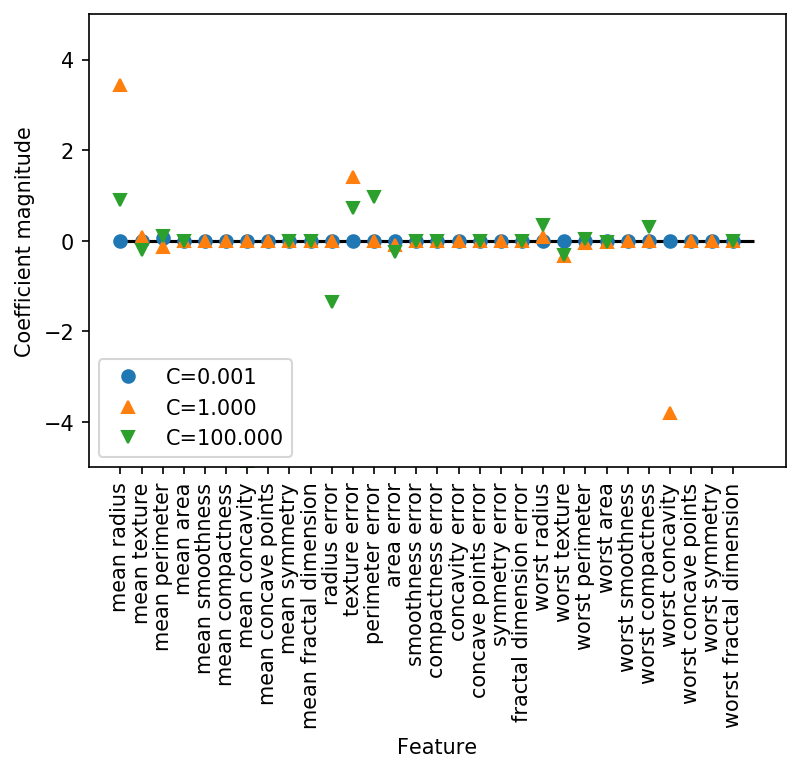

In [81]:
plt.figure(dpi=150)
for C, marker in zip([0.001, 1, 100], ['o', '^', 'v']):
    lr_l1 = LogisticRegression(C=C, penalty="l1", solver='liblinear').fit(X_train, y_train)
    print("Training accuracy of l1 logreg with C={:.3f}: {:.2f}".format(
    C, lr_l1.score(X_train, y_train)))
    print("Test accuracy of l1 logreg with C={:.3f}: {:.2f}".format(
    C, lr_l1.score(X_test, y_test)))
    plt.plot(lr_l1.coef_.T, marker, label="C={:.3f}".format(C))
plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation=90)
plt.hlines(0, 0, cancer.data.shape[1])
plt.xlabel("Feature")
plt.ylabel("Coefficient magnitude")
plt.ylim(-5, 5)
plt.legend(loc=3)

As we can see the main difference is in the `penalty` parameter.


_**Linear models for multiclass classification**_

Linear classification for binary problems don't often naturally extend to multiclass ones (except logistic regression).  One method to extend these binary methods is the __one-vs.-rest__ approach.  A binary model is produced for each class trying to separate it from the rest.  All the models are run on a test point and the model with the highest score of the single class "wins".  The equation in question that needs to be highest is

$$w[0] * x[0] + w[1] * x[1] + . . . + w[p] * x[p] + b$$

An example:

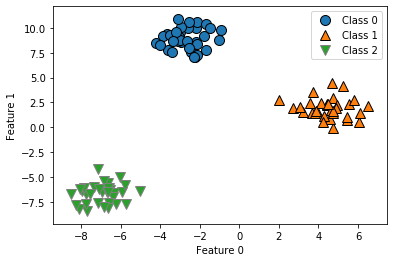

In [84]:
from sklearn.datasets import make_blobs
X, y = make_blobs(random_state=42)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.legend(["Class 0", "Class 1", "Class 2"])